In [89]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#  Load CSV
data_set = pd.read_csv('student_feedback.csv')  # replace with your CSV path

#  Define rating columns
rating_columns = [
    'wellversed_subject', 'understand_way', 'presentation_use',
    'difficulties_assignment', 'doubt_solved', 'course_structure',
    'student_support', 'course_recommandation'
]

#  Convert ratings to numeric
for col in rating_columns:
    data_set[col] = pd.to_numeric(data_set[col], errors='coerce')

#  Average rating per category
avg_ratings = data_set[rating_columns].mean()
print("Average Ratings per Category:\n", avg_ratings)

Average Ratings per Category:
 wellversed_subject         7.497502
understand_way             6.081918
presentation_use           5.942058
difficulties_assignment    5.430569
doubt_solved               5.474525
course_structure           5.636364
student_support            5.662338
course_recommandation      5.598402
dtype: float64


# Average Rating 

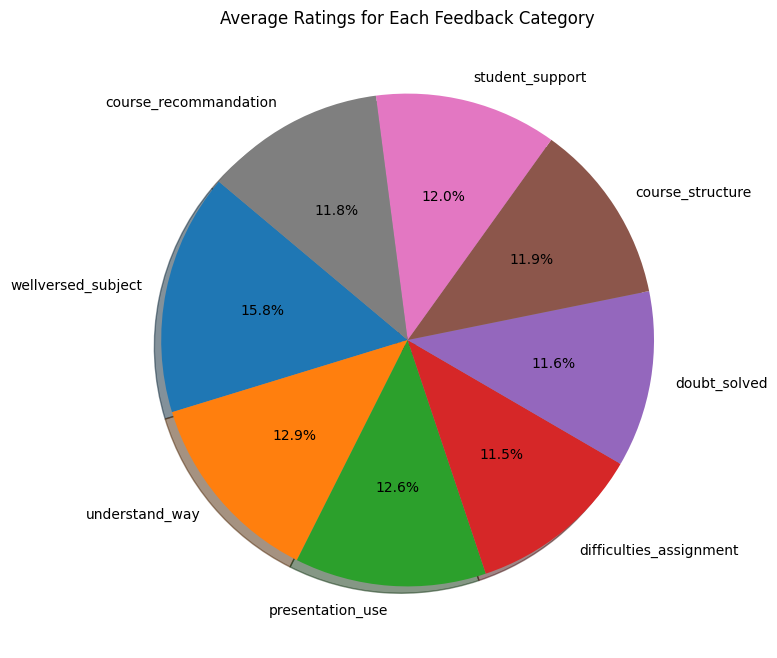

In [91]:
plt.figure(figsize=(8,8))
plt.pie(avg_ratings, labels=rating_columns, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Average Ratings for Each Feedback Category')
plt.show()

# Rating Distribution

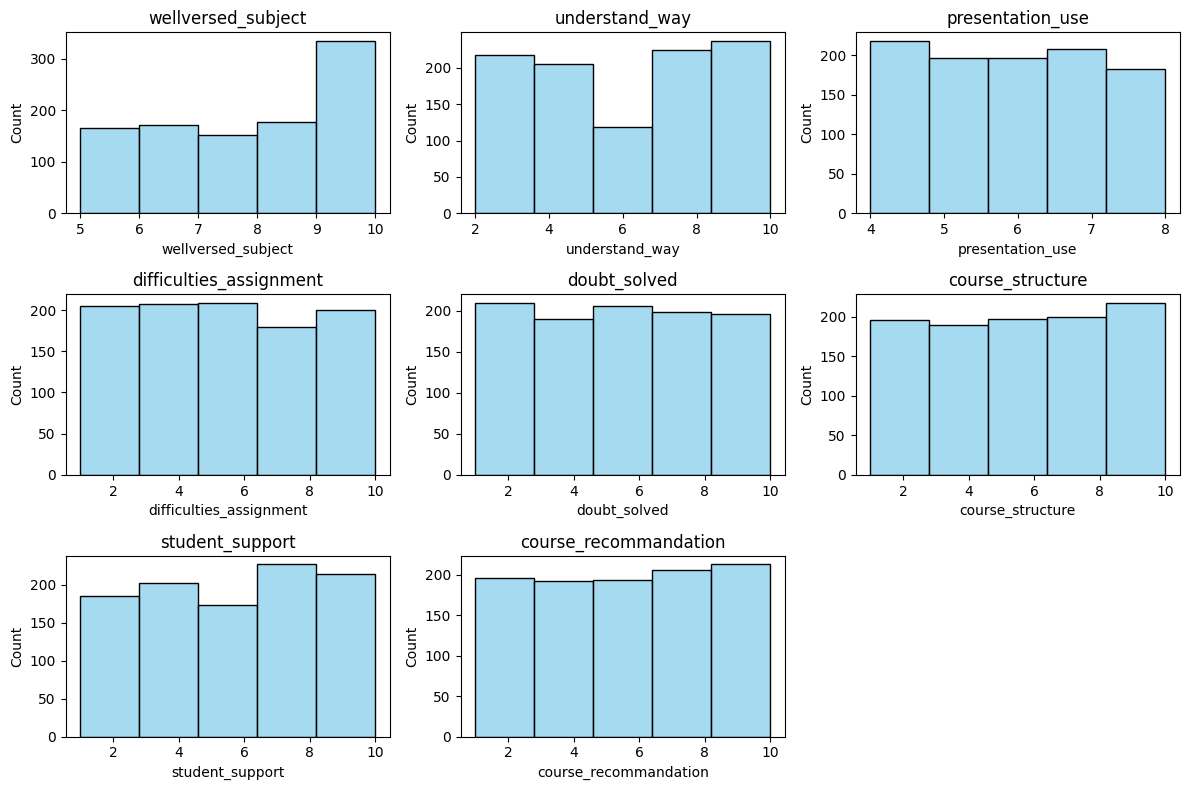

In [92]:
#  Rating Distribution (Histograms) 
plt.figure(figsize=(12,8))
for i, col in enumerate(rating_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data_set[col], bins=5, kde=False, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# Avg Rating by Event Type 

In [88]:
if 'event_type' in data_set.columns:
    avg_by_event = data_set.groupby('event_type')[rating_columns].mean().mean(axis=1).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=avg_by_event.index, y=avg_by_event.values, palette='viridis')
    plt.title('Average Rating by Event Type')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()

In [93]:
# --- Avg Rating by Department (Bar Chart) ---
if 'department' in data_set.columns:
    avg_by_dept = data_set.groupby('department')[rating_columns].mean().mean(axis=1).sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    sns.barplot(x=avg_by_dept.index, y=avg_by_dept.values, palette='plasma')
    plt.title('Average Rating by Department')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()

# --- Top 3 Events with Highest Average Rating ---
if 'event_name' in data_set.columns:
    top3_events = data_set.groupby('event_name')[rating_columns].mean().mean(axis=1).sort_values(ascending=False).head(3)
    plt.figure(figsize=(6,4))
    sns.barplot(x=top3_events.index, y=top3_events.values, palette='cool')
    plt.title('Top 3 Events with Highest Average Rating')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()

# --- Sentiment Analysis (if comments column exists) ---
if 'comments' in data_set.columns:
    data_set['sentiment_score'] = data_set['comments'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
    
    # Categorize sentiment
    def categorize_sentiment(score):
        if score > 0.1:
            return 'Positive'
        elif score < -0.1:
            return 'Negative'
        else:
            return 'Neutral'

    data_set['sentiment_category'] = data_set['sentiment_score'].apply(categorize_sentiment)

    # Sentiment Distribution - Bar Chart
    sentiment_counts = data_set['sentiment_category'].value_counts()
    plt.figure(figsize=(6,4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
    plt.title('Sentiment Distribution of Comments')
    plt.ylabel('Number of Comments')
    plt.show()

    # Sentiment Distribution - Pie Chart
    plt.figure(figsize=(6,6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green','red','gray'])
    plt.title('Sentiment Distribution of Comments')
    plt.show()
